<a href="https://colab.research.google.com/github/codeprogredire/steganography/blob/main/steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Steganography

In [ ]:
from PIL import Image

def encode_image(img, msg):
    """
    Use the red portion of an image (r, g, b) tuple to
    hide the msg string characters as ASCII values
    Return the encoded image
    """
    length = len(msg)
    if length > 255:
        print("text too long! (don't exeed 255 characters)")
        return False
    if img.mode != 'RGB':
        print("image mode needs to be RGB")
        return False
    encoded = img.copy()
    width, height = img.size
    index = 0
    for row in range(height):
        for col in range(width):
            r, g, b = img.getpixel((col, row))
            if row == 0 and col == 0 and index < length:
                asc = length
            elif index <= length:
                c = msg[index -1]
                asc = ord(c)
            else:
                asc = r
            encoded.putpixel((col, row), (asc, g , b))
            index += 1
    return encoded

In [ ]:
def decode_image(img):
    """
    Check the red portion of an image (r, g, b) tuple for
    hidden message characters (ASCII values)
    Return the decoded message
    """
    width, height = img.size
    msg = ""
    index = 0
    for row in range(height):
        for col in range(width):
            try:
                r, g, b = img.getpixel((col, row))
            except ValueError:
                r, g, b, a = img.getpixel((col, row))
            if row == 0 and col == 0:
                length = r
            elif index <= length:
                msg += chr(r)
            index += 1
    return msg


### Original Image:

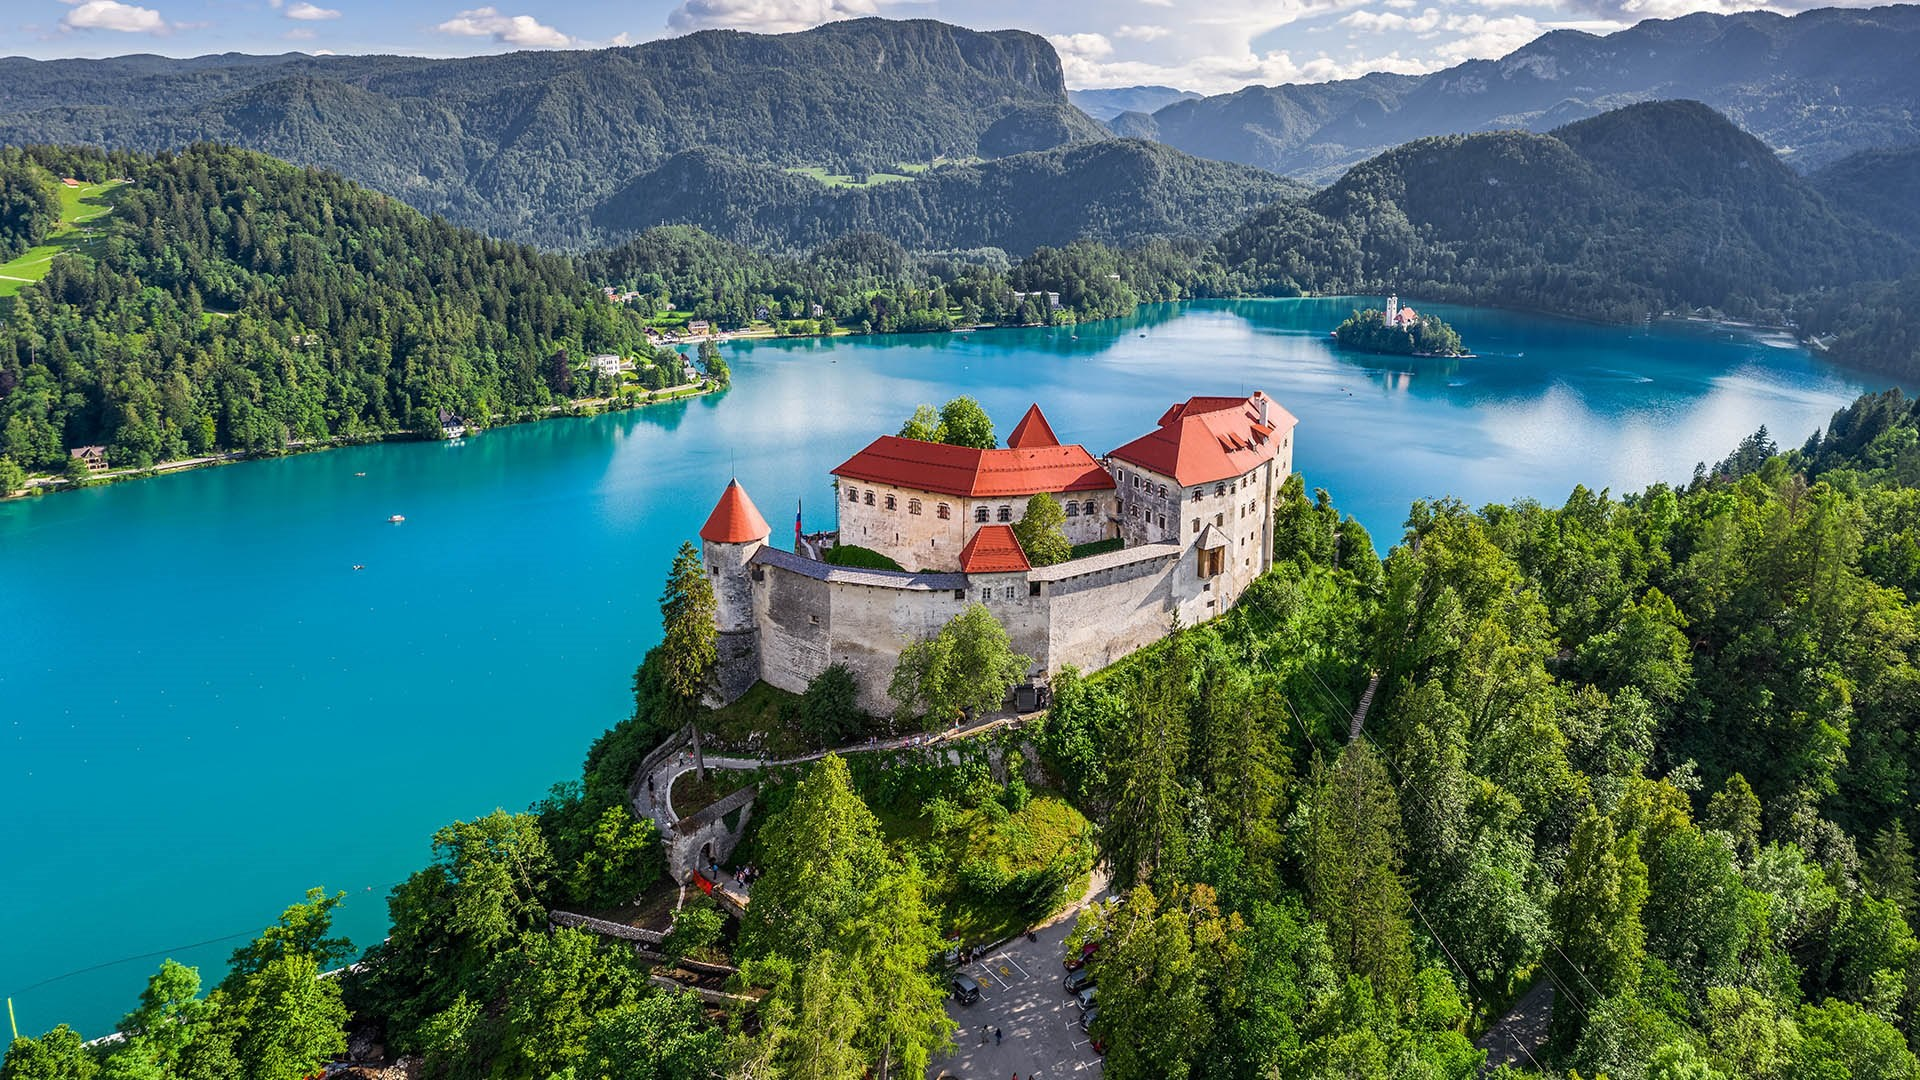

In [ ]:
# Usage:
# Provide the image path and the message to hide
from IPython.display import display,Markdown
img_path = "/content/img.jpg"

img = Image.open(img_path)

msg = "Hello, World!"

title="Original Image:"

display(Markdown(f"### {title}"))
display(img)

encoded_image = encode_image(img, msg)

title="Encoded Image:"
display(Markdown(f"### {title}"))
display(encoded_image)

decoded_msg = decode_image(encoded_image)
print("Decoded Message:")
print(decoded_msg)